# TASK 10.2
## Analiza statystyczna

In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
fare = dataset['Fare']
fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [18]:
mean_fare = np.mean(fare)
median_fare = np.median(fare)
mode_fare = stats.mode(fare)[0][0]
min_fare = fare.min()
max_fare = fare.max()
q0 = np.quantile(fare, 0.0)
q1 = np.round(np.quantile(fare, 0.25))
q2 = np.round(np.quantile(fare, 0.5))
q3 = np.round(np.quantile(fare, 0.75))
q4 = np.round(np.quantile(fare, 1.0))
standard_deviation_fare = np.std(fare, ddof=1)

print(f"Mean = {mean_fare}, median = {median_fare}, moda = {mode_fare}")
print(f"min = {min_fare}, max = {max_fare}, standard deviation = {standard_deviation_fare}")
print(f"Q0: {q0}, Q1: {q1}, Q2: {q2}, Q3: {q3}, Q4: {q4}")


Mean = 32.2042079685746, median = 14.4542, moda = 8.05
min = 0.0, max = 512.3292, standard deviation = 49.693428597180905
Q0: 0.0, Q1: 8.0, Q2: 14.0, Q3: 31.0, Q4: 512.0


/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_11954/1941239651.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_fare = stats.mode(fare)[0][0]


In [22]:
# Skewness
def skewness(data):
    std = np.std(data, ddof=1)
    mean = np.mean(data)
    moda = stats.mode(fare)[0][0]
    result = (mean - moda) / std
    return result

skewness_fare = skewness(fare)
print(f"Skewness = {skewness_fare}")

Skewness = 0.48606442844527054


/var/folders/dl/n6r7g5t96w30wn8vg3gb44640000gn/T/ipykernel_11954/347183212.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = stats.mode(fare)[0][0]


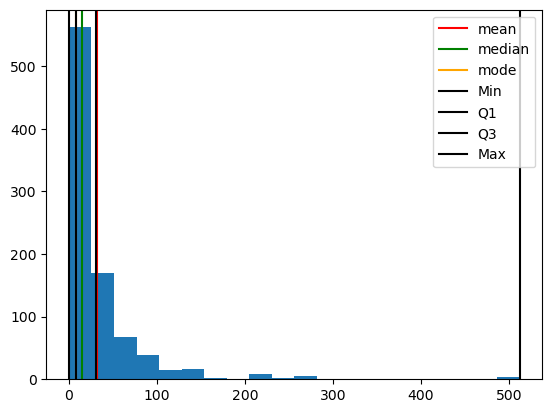

In [20]:
plt.hist(fare, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'mean')
plt.axvline(x = median_fare, color='green', label = 'median')
plt.axvline(x = mode_fare, color='orange', label = 'mode')
plt.axvline(x = min_fare, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = max_fare, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

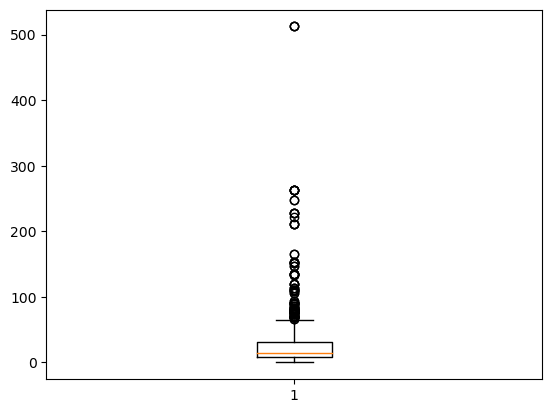

In [23]:
# box
plt.boxplot(fare)
plt.show()

### Analiza
Opłata w zestawionych danych mieści się w zakresie od 0 do 512.33. Wartość średnia wynosi 32.2, mediana to 14.45, moda to 8.05. Analzia tych 3 wartości pozwala określić, że rozkład jest skośnie pozytywny, a współczynnik skośności wynosi ok 0.49. Porównując wyniki z danymi z kwartyli można zauważyć, że wartość średnia jest większa niż wartość 3 qwartylu. Ponadto odchylenie standardowego wynosi 49.7 co znacząco przekracza wartość średnią dla "opłaty". Świadczy to o pojawieniu się niewielkiej ilościa wartości znacznie odbiegających od wartości średniej, co widać na wykresie histogramu jak również wykresie pudełkowym.